In [167]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from nltk.corpus import stopwords

1. Definir el corpus

In [168]:
corpus = [
    "el gato duerme tranquilamente en el sofá mientras observa por la ventana",
    "los perros corren rápidamente por el parque persiguiendo una pelota amarilla",
    "el jardín tiene flores de múltiples colores y árboles altos que dan sombra",
    "en el bosque, los pájaros cantan y los ciervos pastan cerca del río cristalino",
    "el gato y el perro comparten la casa, pero a veces pelean por la comida",
    "el estanque del jardín tiene peces de colores brillantes y ranas que croan por la noche",
    "en la ciudad, las personas caminan rápido mientras los autos avanzan lentamente por el tráfico",
    "la biblioteca está llena de libros antiguos y mesas de estudio donde los estudiantes leen en silencio",
    "en la playa, las olas golpean suavemente la arena y los niños construyen castillos mientras los adultos toman el sol",
    "el laboratorio tiene computadoras avanzadas y científicos trabajando en experimentos complejos"
]

2. Generar la matriz Término-Documento

In [169]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ivanc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [170]:
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(corpus).toarray()
X = X / np.linalg.norm(X, axis=1, keepdims=True)  # Normalización fila por fila
vocab = vectorizer.get_feature_names_out()

# Mostrar la matriz Término-Documento
print("Vocabulario:")
print(vocab)
print("\nMatriz Término-Documento (X):")
print(X)

Vocabulario:
['adultos' 'altos' 'amarilla' 'antiguos' 'arena' 'autos' 'avanzadas'
 'avanzan' 'biblioteca' 'bosque' 'brillantes' 'caminan' 'cantan' 'casa'
 'castillos' 'cerca' 'científicos' 'ciervos' 'ciudad' 'colores' 'comida'
 'comparten' 'complejos' 'computadoras' 'construyen' 'corren' 'cristalino'
 'croan' 'dan' 'duerme' 'estanque' 'estudiantes' 'estudio' 'experimentos'
 'flores' 'gato' 'golpean' 'jardín' 'laboratorio' 'leen' 'lentamente'
 'libros' 'llena' 'mesas' 'mientras' 'múltiples' 'niños' 'noche' 'observa'
 'olas' 'parque' 'pastan' 'peces' 'pelean' 'pelota' 'perro' 'perros'
 'persiguiendo' 'personas' 'playa' 'pájaros' 'ranas' 'rápidamente'
 'rápido' 'río' 'silencio' 'sofá' 'sol' 'sombra' 'suavemente' 'toman'
 'trabajando' 'tranquilamente' 'tráfico' 'veces' 'ventana' 'árboles']

Matriz Término-Documento (X):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.    

2.1. Calcular las Dimensiones de X

In [171]:
N, d_model = X.shape  # Número de documentos y tamaño del vocabulario
num_heads = 7  # Dividir en 3 cabezas
d_k = d_model // num_heads  # Dimensión por cabeza (para simplificar)
d_k

11

Dimensiones clave:
X: (N, d_model), donde N = número de documentos, d_model = tamaño del vocabulario
vocab: (d_model,), contiene los términos únicos del vocabulario

3. Crear las matrices entrenables (W_Q, W_K, W_V)

In [172]:
np.random.seed(42)  # Para reproducibilidad
W_Q = np.random.rand(d_model, d_k)
W_K = np.random.rand(d_model, d_k)
W_V = np.random.rand(d_model, d_k)
W_Q

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
        0.02058449],
       [0.96990985, 0.83244264, 0.21233911, 0.18182497, 0.18340451,
        0.30424224, 0.52475643, 0.43194502, 0.29122914, 0.61185289,
        0.13949386],
       [0.29214465, 0.36636184, 0.45606998, 0.78517596, 0.19967378,
        0.51423444, 0.59241457, 0.04645041, 0.60754485, 0.17052412,
        0.06505159],
       [0.94888554, 0.96563203, 0.80839735, 0.30461377, 0.09767211,
        0.68423303, 0.44015249, 0.12203823, 0.49517691, 0.03438852,
        0.9093204 ],
       [0.25877998, 0.66252228, 0.31171108, 0.52006802, 0.54671028,
        0.18485446, 0.96958463, 0.77513282, 0.93949894, 0.89482735,
        0.59789998],
       [0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033,
        0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
        0.54269608],
       [0.14092422, 0.80219698, 0.07455064, 0.98688694, 0.

4. Calcular Q, K, V

In [173]:
Q = np.dot(X, W_Q)
K = np.dot(X, W_K)
V = np.dot(X, W_V)
Q

array([[1.23213784, 1.64422451, 0.87577149, 1.68752599, 1.73199157,
        1.88807565, 1.58346187, 1.54122282, 1.42024625, 1.02956775,
        1.31546369],
       [1.20572532, 1.31267221, 1.63035456, 1.60210555, 1.40442135,
        1.07704647, 1.09815255, 0.57002528, 1.1425945 , 1.0525493 ,
        0.80821092],
       [1.47877264, 1.5721297 , 1.07996021, 1.34396936, 1.35218908,
        1.7352883 , 1.11121575, 1.71350231, 1.45189965, 1.49845801,
        1.1846687 ],
       [0.96035495, 1.37000758, 1.14441891, 0.97579282, 1.23471842,
        1.57420423, 1.24764473, 1.50400103, 1.21168509, 1.26744569,
        1.31578201],
       [1.48314619, 1.16060046, 0.75449641, 1.09663413, 1.19860261,
        0.78212231, 1.30123991, 1.16799095, 1.18728658, 1.32700417,
        1.87957395],
       [1.10911551, 1.65663459, 1.18437291, 1.37928171, 1.37724434,
        1.81166125, 1.71096519, 1.6403462 , 1.88474288, 1.52319448,
        1.35192751],
       [1.52220555, 1.44962883, 0.95026271, 1.1390293 , 1.

5. Cálculo de la atención

In [174]:
# Producto QK^T
scores = np.dot(Q, K.T)
# Escalar por raíz de d_k
scaled_scores = scores / np.sqrt(d_k)
# Softmax para obtener los pesos
attention_weights = np.exp(scaled_scores) / np.sum(np.exp(scaled_scores), axis=1, keepdims=True)
# Ponderar V con los pesos
output = np.dot(attention_weights, V)
attention_weights

array([[0.05709171, 0.0552337 , 0.06278384, 0.09143275, 0.06198191,
        0.09851097, 0.06102197, 0.087238  , 0.34945684, 0.07524832],
       [0.07154565, 0.06310519, 0.07645364, 0.08113967, 0.06335461,
        0.10178146, 0.06367481, 0.07523307, 0.32719086, 0.07652104],
       [0.06618297, 0.05826267, 0.06909248, 0.09963156, 0.06135958,
        0.09882278, 0.06132792, 0.08834127, 0.3279827 , 0.06899607],
       [0.06876649, 0.05864783, 0.06905512, 0.10461064, 0.06734636,
        0.09927878, 0.06403948, 0.09319846, 0.29863506, 0.07642179],
       [0.08276039, 0.05700517, 0.06433089, 0.09247222, 0.07602703,
        0.0876793 , 0.0639315 , 0.08576227, 0.32112291, 0.06890832],
       [0.06012896, 0.05744295, 0.06162869, 0.09367959, 0.06434869,
        0.10931348, 0.05666522, 0.09217708, 0.33685357, 0.06776176],
       [0.06820141, 0.05070162, 0.06661153, 0.09588033, 0.06088958,
        0.08808908, 0.06092915, 0.08800833, 0.34973763, 0.07095135],
       [0.07076776, 0.04593253, 0.0689690

In [175]:
output

array([[1.64206137, 1.67911209, 1.28388025, 1.46001905, 1.43233938,
        1.51001449, 1.4178411 , 1.78240841, 1.58570075, 1.54985623,
        1.79769982],
       [1.61721569, 1.65642354, 1.27784558, 1.45715216, 1.41812947,
        1.50145816, 1.4053051 , 1.75505027, 1.58275401, 1.53691896,
        1.78060973],
       [1.62381626, 1.66542711, 1.28419872, 1.45155106, 1.41998214,
        1.49981291, 1.40704485, 1.76208094, 1.58119692, 1.53739356,
        1.78089676],
       [1.59842606, 1.65419835, 1.28445576, 1.43479749, 1.39856871,
        1.49036574, 1.40056302, 1.73807779, 1.57251708, 1.51835984,
        1.75424582],
       [1.6175553 , 1.66223605, 1.2672905 , 1.44091042, 1.41337983,
        1.49577708, 1.40517965, 1.75006971, 1.57897013, 1.53321474,
        1.77727529],
       [1.62459938, 1.6691575 , 1.28465532, 1.46372383, 1.4240292 ,
        1.50881087, 1.40990085, 1.76671049, 1.57927142, 1.5472827 ,
        1.78033189],
       [1.64619558, 1.67852951, 1.2782157 , 1.45178735, 1.

5. Definir Self-Attention

In [176]:
# Definimos la función softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Evitar desbordamiento numérico
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Función de Self-Attention
def self_attention(Q, K, V):
    d_k = Q.shape[-1]  # Dimensión de las claves (d_k)
    # 1. Producto QK^T (relaciones entre consultas y claves)
    scores = np.dot(Q, K.T)  # Dimensión: (N, N)
    # 2. Escalamiento por sqrt(d_k)
    scaled_scores = scores / np.sqrt(d_k)
    # 3. Aplicar softmax (normalización de las relaciones)
    attention_weights = softmax(scaled_scores)  # Dimensión: (N, N)
    # 4. Multiplicar por V (valores ponderados por atención)
    output = np.dot(attention_weights, V)  # Dimensión: (N, d_k)
    return output, attention_weights

6. Implementar Multi-Head Attention

In [177]:
# Función de Multi-Head Attention
def multi_head_attention(X, W_Q, W_K, W_V, W_O, num_heads):
    """
    X: Matriz de entrada (N, d_model)
    W_Q, W_K, W_V: Matrices entrenables para Q, K, V (d_model, d_model)
    W_O: Matriz para la proyección final (d_model, d_model)
    num_heads: Número de cabezas de atención
    """
    N, d_model = X.shape
    assert d_model % num_heads == 0, "El número de cabezas debe dividir exactamente d_model"
    d_k = d_model // num_heads  # Dimensión por cabeza

    # Dividir las matrices de proyección para cada cabeza
    heads_output = []  # Lista para almacenar la salida de cada cabeza
    all_attention_weights = []  # Lista para almacenar los pesos de atención de cada cabeza
    for head in range(num_heads):
        # Proyectar las entradas en Q, K, V para esta cabeza
        Q = np.dot(X, W_Q[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)
        K = np.dot(X, W_K[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)
        V = np.dot(X, W_V[:, head * d_k:(head + 1) * d_k])  # Dimensión: (N, d_k)

        # Calcular Self-Attention para esta cabeza
        head_output, attention_weights = self_attention(Q, K, V)  # Dimensión: (N, d_k)
        heads_output.append(head_output)
        all_attention_weights.append(attention_weights)

    # Concatenar las salidas de todas las cabezas
    concatenated = np.concatenate(heads_output, axis=1)  # Dimensión: (N, d_model)

    # Aplicar proyección final
    output = np.dot(concatenated, W_O[:, :d_model])  # Aseguramos que W_O tenga la forma correcta
    return output, all_attention_weights

7. Visualizar pesos de atención

In [178]:
def visualize_attention(weights, title):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.heatmap(weights, annot=True, cmap="Blues", fmt=".2f", cbar=True)
    plt.title(title)
    plt.xlabel("Keys (K)")
    plt.ylabel("Queries (Q)")
    plt.show()

8. Definir parámetros entrenables aleatorios para Multi-Head Attention

In [179]:
d_model = X.shape[1]  # Tamaño del vocabulario
num_heads = 7
print(d_model)
print(num_heads)
assert d_model % num_heads == 0, "El número de cabezas debe dividir exactamente d_model"
d_k = d_model // num_heads  # Dimensión por cabeza (d_model dividido entre num_heads)
np.random.seed(42)  # Para reproducibilidad
W_Q = np.random.rand(d_model, d_model)  # Proyección para Q
np.random.seed(43)  # Para reproducibilidad
W_K = np.random.rand(d_model, d_model)  # Proyección para K
np.random.seed(44)  # Para reproducibilidad
W_V = np.random.rand(d_model, d_model)  # Proyección para V
np.random.seed(45)  # Para reproducibilidad
W_O = np.random.rand(d_model, d_model)  # Proyección final

77
7


9. Calcular la salida y pesos de atención para Self-Attention

In [180]:
# Proyectar X para generar Q, K, V usando matrices entrenables
Q = np.dot(X, W_Q[:, :d_k])  # Proyección para Q (dimensión: (N, d_k))
K = np.dot(X, W_K[:, :d_k])  # Proyección para K (dimensión: (N, d_k))
V = np.dot(X, W_V[:, :d_k])  # Proyección para V (dimensión: (N, d_k))
self_attention_output, self_attention_weights = self_attention(Q, K, V)

10. Calcular la salida y pesos de atención para Multi-Head Attention

In [181]:
multi_head_output, multi_head_attention_weights = multi_head_attention(X, W_Q, W_K, W_V, W_O, num_heads)

11. Mostrar resultados

In [182]:
print("Vocabulario:", vocab)
print("\nSalida de Self-Attention:\n", self_attention_output)
print("\nSalida de Multi-Head Attention:\n", multi_head_output)

Vocabulario: ['adultos' 'altos' 'amarilla' 'antiguos' 'arena' 'autos' 'avanzadas'
 'avanzan' 'biblioteca' 'bosque' 'brillantes' 'caminan' 'cantan' 'casa'
 'castillos' 'cerca' 'científicos' 'ciervos' 'ciudad' 'colores' 'comida'
 'comparten' 'complejos' 'computadoras' 'construyen' 'corren' 'cristalino'
 'croan' 'dan' 'duerme' 'estanque' 'estudiantes' 'estudio' 'experimentos'
 'flores' 'gato' 'golpean' 'jardín' 'laboratorio' 'leen' 'lentamente'
 'libros' 'llena' 'mesas' 'mientras' 'múltiples' 'niños' 'noche' 'observa'
 'olas' 'parque' 'pastan' 'peces' 'pelean' 'pelota' 'perro' 'perros'
 'persiguiendo' 'personas' 'playa' 'pájaros' 'ranas' 'rápidamente'
 'rápido' 'río' 'silencio' 'sofá' 'sol' 'sombra' 'suavemente' 'toman'
 'trabajando' 'tranquilamente' 'tráfico' 'veces' 'ventana' 'árboles']

Salida de Self-Attention:
 [[1.67497984 1.58827767 1.72805205 1.40604697 1.74370797 1.72293662
  1.60901901 2.00507542 1.50836324 1.55318661 2.01428371]
 [1.66132367 1.572456   1.70959556 1.40424529 1.7

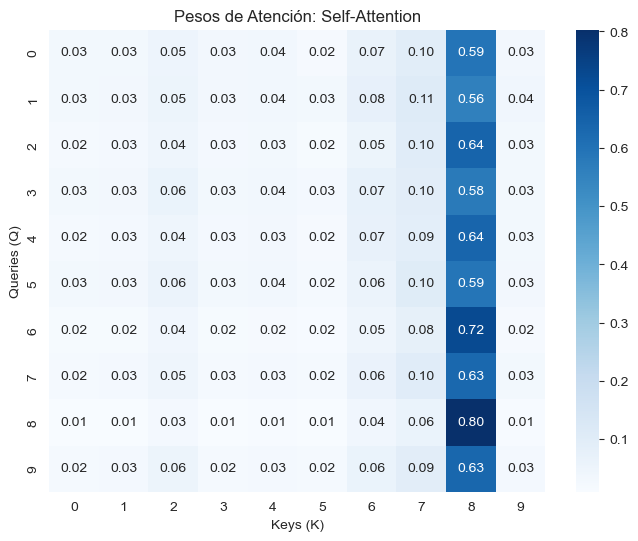

In [183]:
visualize_attention(self_attention_weights, "Pesos de Atención: Self-Attention")

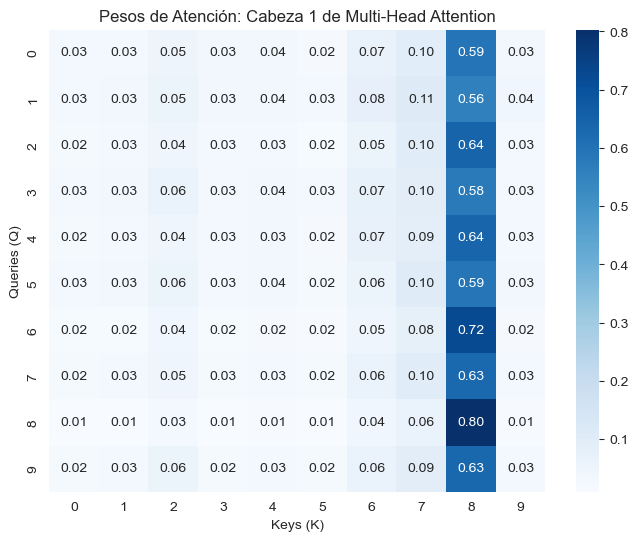

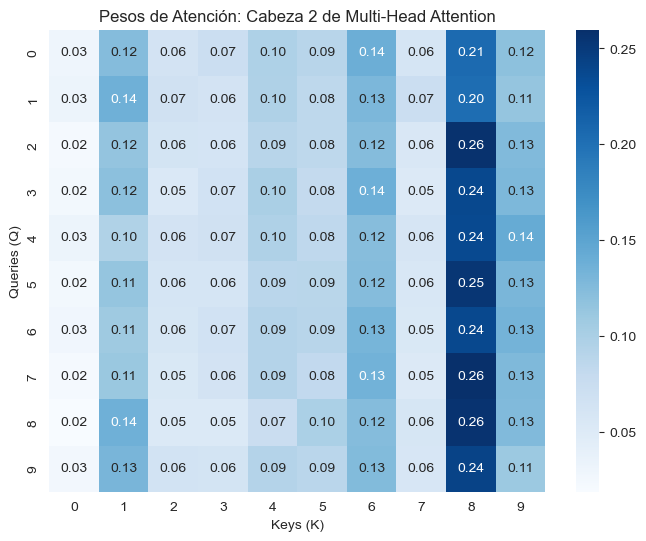

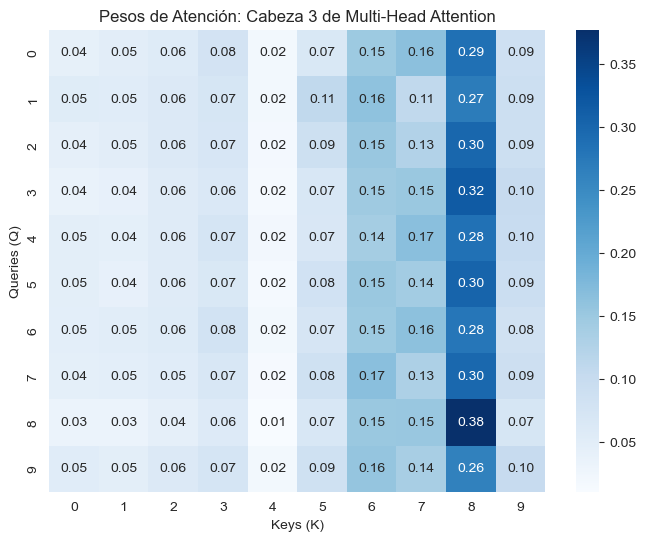

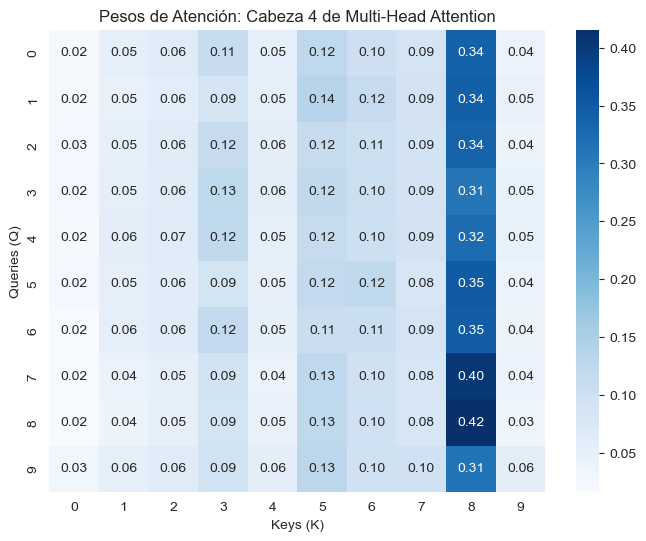

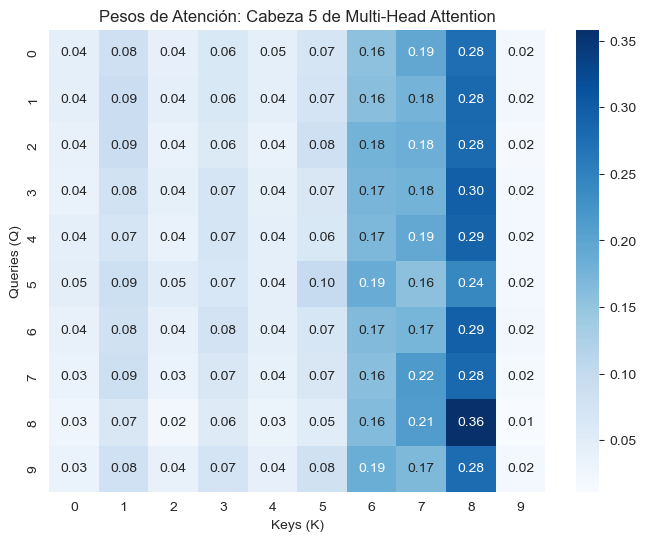

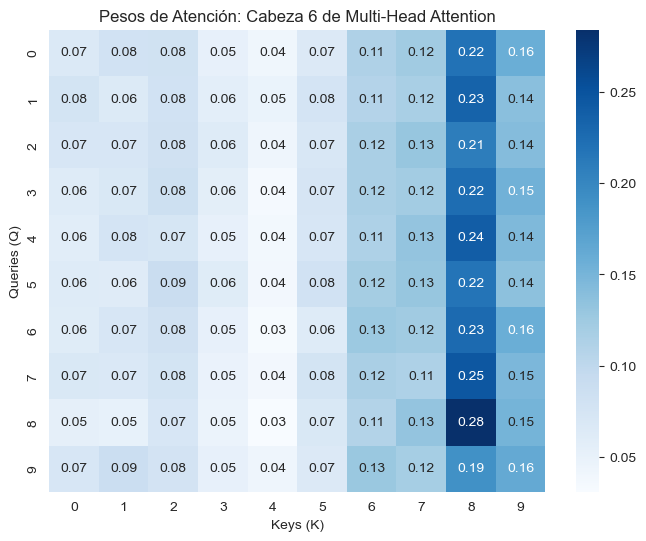

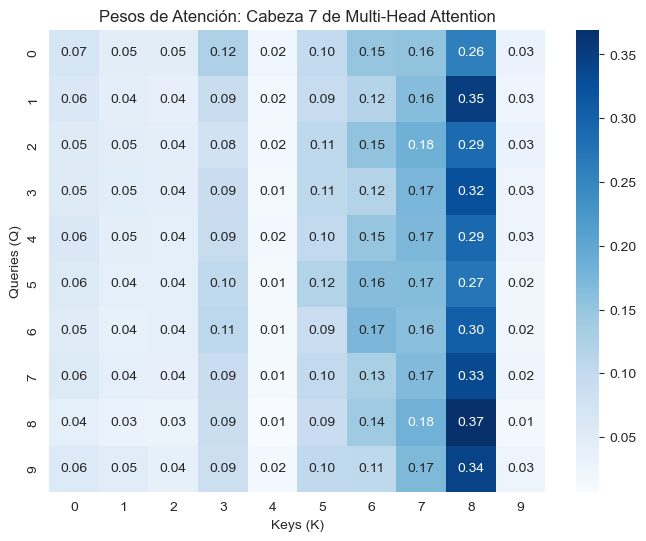

In [185]:
for i, weights in enumerate(multi_head_attention_weights):
    visualize_attention(weights, f"Pesos de Atención: Cabeza {i + 1} de Multi-Head Attention")